# This script contains the following points:

## PART 3

### 08. Customer profile aggregation for usage frequency and expenditure

### 09. Customer profile comparison in regions and departments


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path

path = r'C:\Users\nang6\OneDrive\Bureau\Data Analytics\Data Immersion\Achievement 4\02-2020 Instacart Basket Analysis'

In [3]:
# Import final

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21678634 entries, 1 to 32404854
Data columns (total 41 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int8    
 11  department_id                  int8    
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

In [5]:
# Show all columns

pd.set_option('display.max_columns', None)

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag,age_category,income_flag,dependants_flag,household,department,alcohol_consumer,bakery_consumer,order_time_period
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average Orders,10,New customer,9.0,Low spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages,No,No,Early bird
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average Orders,10,New customer,9.0,Low spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages,No,No,Early bird
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most Orders,10,New customer,9.0,Low spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages,No,No,Regular
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Average Orders,10,New customer,9.0,Low spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages,No,No,Early bird
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most Orders,10,New customer,9.0,Low spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages,No,No,Regular


# 08. Customer profile aggregation for usage frequency and expenditure

### Household on usage frequency and expenditure

In [7]:
df.groupby('household').agg({'days_since_prior_order': ['mean', 'min', 'max'], 'prices' : ['mean', 'min', 'max']})

days_since_prior_order               prices  \
                                                  mean  min   max      mean   
household                                                                     
Family no dependants-High                    10.798390  0.0  30.0  7.950824   
Family no dependants-Low                     10.932272  0.0  30.0  7.320397   
Family no dependants-Middle                  10.767305  0.0  30.0  7.955541   
Family with dependants-High                   9.107302  0.0  30.0  7.938446   
Family with dependants-Low                   10.912612  0.0  30.0  7.640143   
Family with dependants-Middle                10.618886  0.0  30.0  7.963995   
One person no dependants-High                10.639662  0.0  30.0  7.935528   
One person no dependants-Low                 10.820693  0.0  30.0  7.665861   
One person no dependants-Middle              10.824019  0.0  30.0  7.955798   

                                            
                                 min   max  
household                                   
Family no dependants-High        1.0  25.0  
Family no dependants-Low         1.0  25.0  
Family no dependants-Middle      1.0  25.0  
Family with dependants-High      1.0  25.0  
Family with dependants-Low       1.0  25.0  
Family with dependants-Middle    1.0  25.0  
One person no dependants-High    1.0  25.0  
One person no dependants-Low     1.0  25.0  
One person no dependants-Middle  1.0  25.0

### Department category expenditure aggregation

In [8]:
df.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices                     
                      mean       min        max
department                                     
alcohol           8.160565  1.000000  15.000000
babies            7.627942  1.000000  15.000000
bakery            7.860151  1.000000  15.000000
beverages         7.680644  1.000000  15.000000
breakfast         8.031277  1.000000  14.898438
bulk              8.346585  1.400391  14.101562
canned goods      7.546866  1.000000  15.000000
dairy eggs        8.331208  1.000000  15.000000
deli              7.779815  1.000000  15.000000
dry goods pasta   7.349757  1.000000  15.000000
frozen            7.733144  1.000000  15.000000
household         7.376858  1.000000  15.000000
international     7.684542  1.000000  15.000000
meat seafood     16.298504  8.000000  25.000000
missing           8.643516  1.000000  15.000000
other             6.972387  1.099609  15.000000
pantry            8.012300  1.000000  20.000000
personal care     7.995975  1.000000  15.000000
pets              7.900247  1.000000  15.000000
produce           7.980275  1.000000  15.000000
snacks            4.276057  1.599609   7.000000

### Loyalty status on usage frequency

In [9]:
df.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean', 'min', 'max']}), 

(                 days_since_prior_order           
                                    mean  min   max
 loyalty_flag                                      
 Loyal customer                 6.027159  0.0  30.0
 New customer                  17.598195  0.0  30.0
 Regular customer              12.156479  0.0  30.0,)

### Loyalty status on usage frequency by Region

In [10]:
df.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean', 'min', 'max']}), 

(                 days_since_prior_order           
                                    mean  min   max
 loyalty_flag                                      
 Loyal customer                 6.027159  0.0  30.0
 New customer                  17.598195  0.0  30.0
 Regular customer              12.156479  0.0  30.0,)

# 09. Customer profile comparison in regions and departments

### Create a crosstab with 'household' and 'departements' columns

In [11]:
crosstab_household_dep = pd.crosstab(df['household'], df['department'], dropna = False)

In [12]:
# Show all columns

pd.set_option('display.max_columns', None)

In [13]:
crosstab_household_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
household,,,,,,,,,,,,,,,,,,,,,
Family no dependants-High,23706,66328,178302,380140,100324,4620,165394,812074,154835,132854,334800,109175,40284,114523,10189,5350,283249,65708,15154,1421717,371186
Family no dependants-Low,17799,43935,135727,378319,95485,4938,113876,629302,125758,91872,260653,94290,29790,66124,7966,4166,213440,54348,10914,1090890,485479
Family no dependants-Middle,27992,90761,236095,506291,133953,7078,220219,1103612,210412,179692,447808,142962,55316,152700,13729,7107,379890,88582,18785,1949943,505314
Family with dependants-High,337,172,593,971,311,2,543,2349,342,389,1219,525,83,328,20,43,889,269,62,2361,1031
Family with dependants-Low,3078,6374,18038,44113,12034,610,16384,85882,17055,13211,36012,11685,4218,10377,1256,654,29526,7371,1868,146863,52577
Family with dependants-Middle,2436,7089,18898,38313,10797,553,16849,87037,16271,14112,34786,11136,4345,11933,1083,562,29853,6594,1829,152408,38459
One person no dependants-High,4763,11007,29231,61869,16374,754,26503,131553,24948,21171,53394,18037,6415,17697,1663,896,46175,10316,2676,229236,60313
One person no dependants-Low,14211,38295,110580,267624,68685,3264,96682,511938,102118,79214,210781,69355,25235,62709,6160,3491,174978,43175,9078,896228,303981
One person no dependants-Middle,6844,23058,57325,122450,31645,1584,52317,262150,50620,42483,106967,32311,13727,35667,3322,1702,89429,21022,4801,466608,119237


([<matplotlib.axis.XTick at 0x16d70a9f7f0>,
 [Text(0, 0, 'One person\nno dependants\nHigh income'),
  Text(1, 0, 'One person\nno dependants\nMiddle income'),
  Text(2, 0, 'One person\nno dependants\nLow income'),
  Text(3, 0, 'Family\nwith dependants\nHigh income'),
  Text(4, 0, 'Family\nwith dependants\nMiddle income'),
  Text(5, 0, 'Family\nwith dependants\nLow income'),
  Text(6, 0, 'Family\nno dependants\nHigh income'),
  Text(7, 0, 'Family\nno dependants\nMiddle income'),
  Text(8, 0, 'Family\nno dependants\nLow income')])

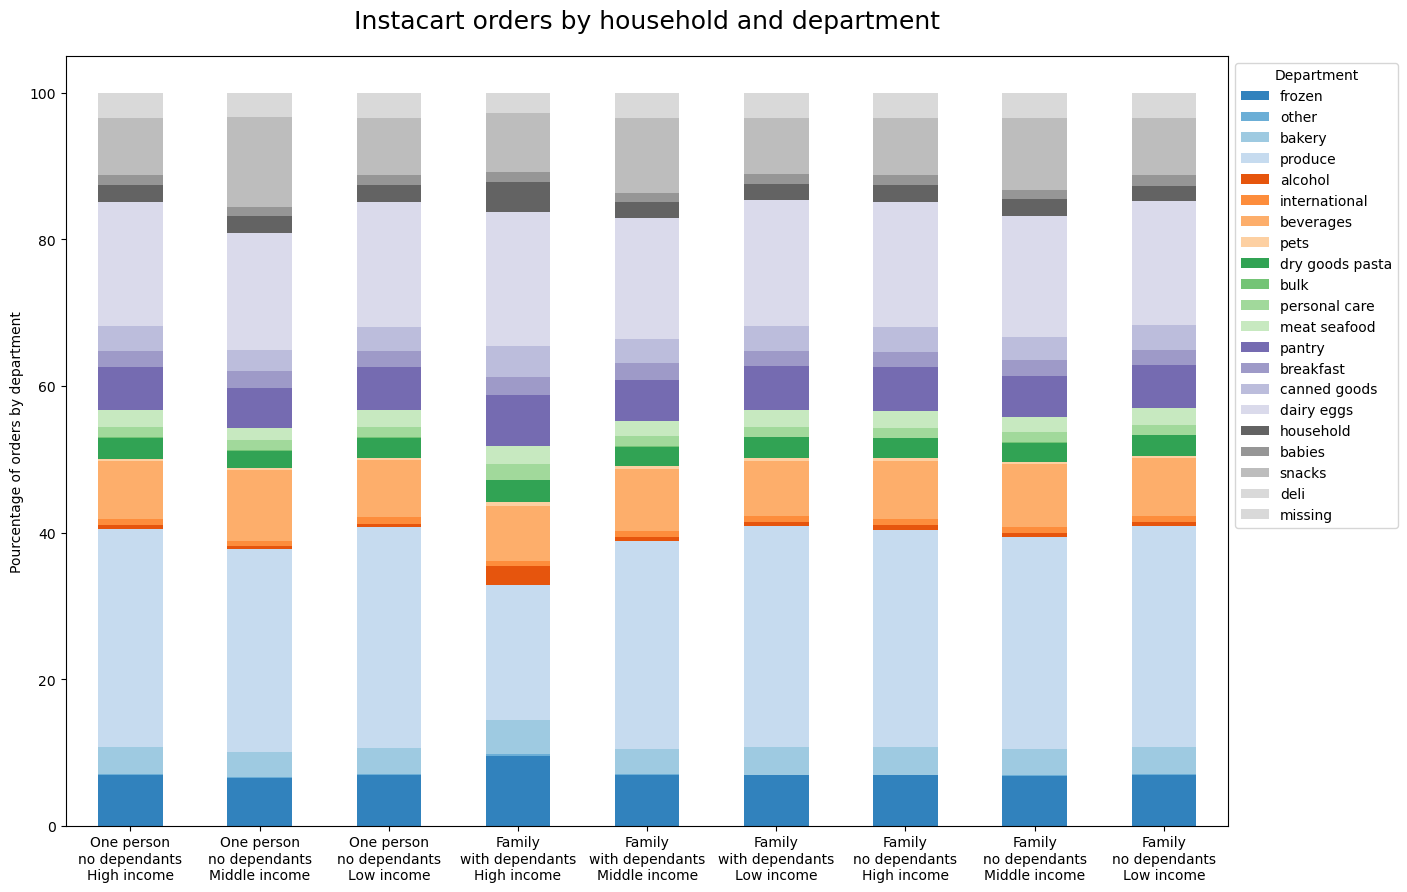

In [14]:
# Create a stacked bar chart

bar_household_dep = crosstab_household_dep.loc[:,['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,10), colormap='tab20c').legend(title = 'Department', bbox_to_anchor=(1.0,1.0))

plt.ylabel('Pourcentage of orders by department')
plt.xlabel ('')
plt.title ('Instacart orders by household and department', fontsize = 18, pad = 20)
plt.xticks([0,1,2,3,4,5,6,7,8],['One person\nno dependants\nHigh income','One person\nno dependants\nMiddle income','One person\nno dependants\nLow income','Family\nwith dependants\nHigh income','Family\nwith dependants\nMiddle income','Family\nwith dependants\nLow income', 'Family\nno dependants\nHigh income','Family\nno dependants\nMiddle income', 'Family\nno dependants\nLow income'])


#### Observation: Across all household, produce is really popular following by dairy eggs.

In [15]:
# Export

bar_household_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'staked_bar_household_dep.png'), bbox_inches = 'tight')

### Create a crosstab with 'household' and 'region' columns

In [16]:
crosstab_household_region= pd.crosstab(df['household'], df['region'], dropna = False)

In [17]:
crosstab_household_region

region,Midwest,Northeast,South,West
household,,,,
Family no dependants-High,1140425,858151,1571533,1219803
Family no dependants-Low,922702,687449,1316844,1028076
Family no dependants-Middle,1498879,1152533,2168979,1657850
Family with dependants-High,2399,1131,6310,2999
Family with dependants-Low,122159,85876,176524,134627
Family with dependants-Middle,121483,92472,171347,120041
One person no dependants-High,194252,123418,256714,200607
One person no dependants-Low,709800,559334,1034589,794059
One person no dependants-Middle,371737,266202,516550,390780


([<matplotlib.axis.XTick at 0x16d723ffa60>,
 [Text(0, 0, 'One person\nno dependants\nHigh income'),
  Text(1, 0, 'One person\nno dependants\nMiddle income'),
  Text(2, 0, 'One person\nno dependants\nLow income'),
  Text(3, 0, 'Family\nwith dependants\nHigh income'),
  Text(4, 0, 'Family\nwith dependants\nMiddle income'),
  Text(5, 0, 'Family\nwith dependants\nLow income'),
  Text(6, 0, 'Family\nno dependants\nHigh income'),
  Text(7, 0, 'Family\nno dependants\nMiddle income'),
  Text(8, 0, 'Family\nno dependants\nLow income')])

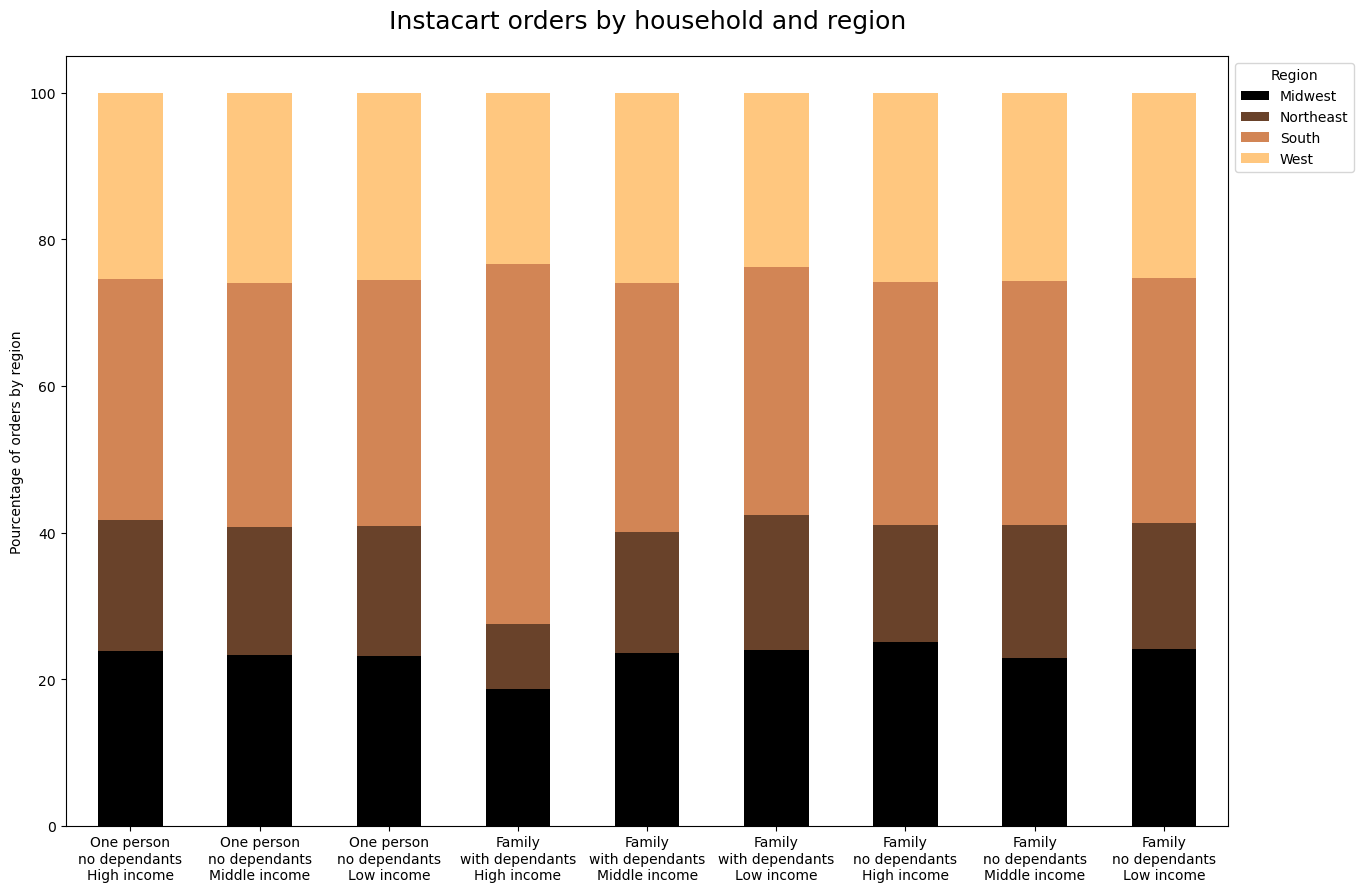

In [18]:
# Create a stacked bar chart

bar_household_region = crosstab_household_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,10), colormap='copper').legend(title = 'Region', bbox_to_anchor=(1.0,1.0))

plt.ylabel('Pourcentage of orders by region')
plt.xlabel ('')
plt.title ('Instacart orders by household and region', fontsize = 18, pad = 20)
plt.xticks([0,1,2,3,4,5,6,7,8],['One person\nno dependants\nHigh income','One person\nno dependants\nMiddle income','One person\nno dependants\nLow income','Family\nwith dependants\nHigh income','Family\nwith dependants\nMiddle income','Family\nwith dependants\nLow income', 'Family\nno dependants\nHigh income','Family\nno dependants\nMiddle income', 'Family\nno dependants\nLow income'])


#### Observation: Most households come from South department.

In [19]:
# Export

bar_household_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'staked_bar_household_region.png'), bbox_inches = 'tight')

### Create a crosstab with 'department' and 'prices_range_loc' columns

In [20]:
crosstab_dep_price = pd.crosstab(df['department'], df['price_range_loc'], dropna = False)

In [21]:
crosstab_dep_price

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,22991,78175
babies,0,85150,201869
bakery,0,192383,592406
beverages,0,570269,1229821
breakfast,0,146577,323031
bulk,0,811,22592
canned goods,0,197170,511597
dairy eggs,0,963283,2662614
deli,0,209688,492671


Text(0, 0.5, '')

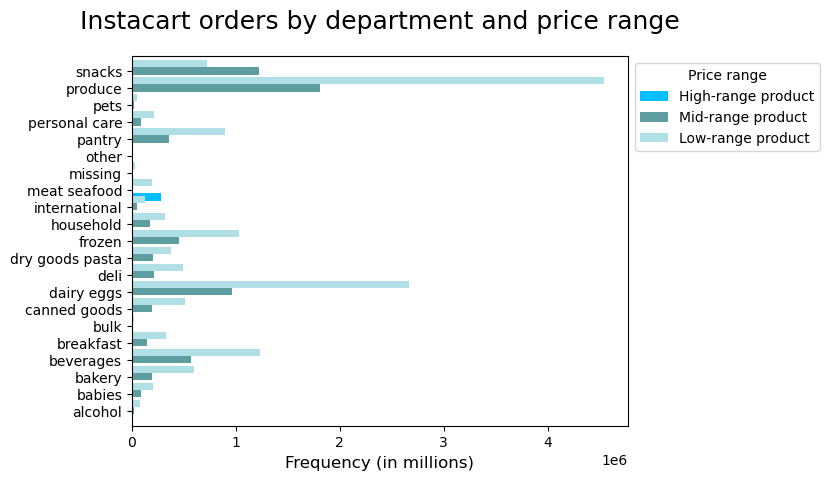

In [22]:
# create bar chart

bar_dep_price = crosstab_dep_price.plot.barh(rot = 0, width = 1.25, color = ['deepskyblue', 'cadetblue', 'powderblue'])

bar_dep_price.legend(title = 'Price range', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['High-range product', 'Mid-range product', 'Low-range product'])

plt.title('Instacart orders by department and price range', fontsize = 18, pad = 20)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.ylabel('')


In [23]:
# Descriptive statistics of 'pice' column

df.agg({ 'prices' : ['mean', 'min', 'max']})

,prices
mean,7.789165
min,1.000000
max,25.000000


#### Observation: Low-range product are most popular folowing by mid then low-range products

In [24]:
# Export

bar_dep_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_price.png'), bbox_inches = 'tight')

### Crosstab with 'region' and 'loyalty_flag' columns


In [25]:
crosstab_reg_loyal = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [26]:
crosstab_reg_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,1663098,795650,2625088
Northeast,1290075,589168,1947323
South,2384134,1115469,3719787
West,1864073,861673,2823096


Text(0.5, 0, 'Region')

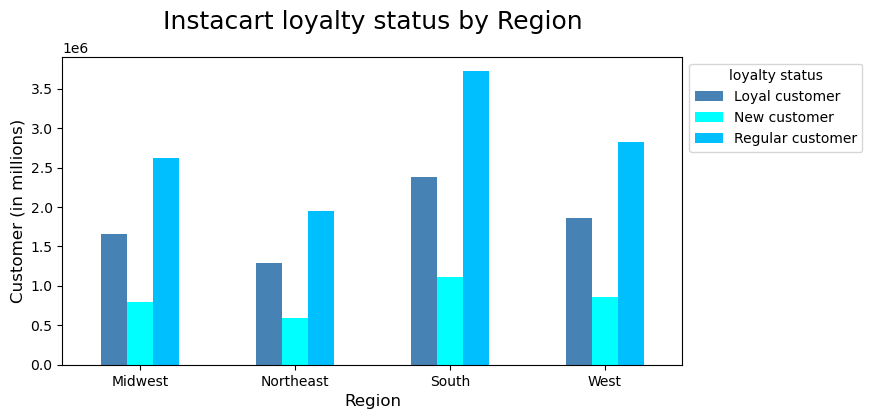

In [27]:
# Create a bar chart

bar_reg_loyal = crosstab_reg_loyal.plot.bar(rot = 0, color = ['steelblue', 'cyan', 'deepskyblue'], figsize = (8, 4))

bar_reg_loyal.legend(title = 'loyalty status', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Loyal customer', 'New customer', 'Regular customer'])

plt.title('Instacart loyalty status by Region', fontsize = 18, pad = 20)
plt.ylabel('Customer (in millions)', fontsize = 12)
plt.xlabel('Region', fontsize = 12)

In [28]:
# Export

bar_reg_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_reg_loyal.png'), bbox_inches = 'tight')

### Create a crosstab with 'loyalty_flag' and 'days_since_prior_order'

In [29]:
crosstab_order_loyal = pd.crosstab(df['days_since_prior_order'], df['loyalty_flag'], dropna = False)

In [30]:
crosstab_order_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,167752,28422,110628
1.0,438621,30444,183343
2.0,681461,42522,292734
3.0,830539,60171,411628
4.0,842561,75218,522637
5.0,752253,95156,620732
6.0,764095,134223,837137
7.0,946554,203634,1242620
8.0,449768,129277,744868


Text(0.5, 0, 'frequency')

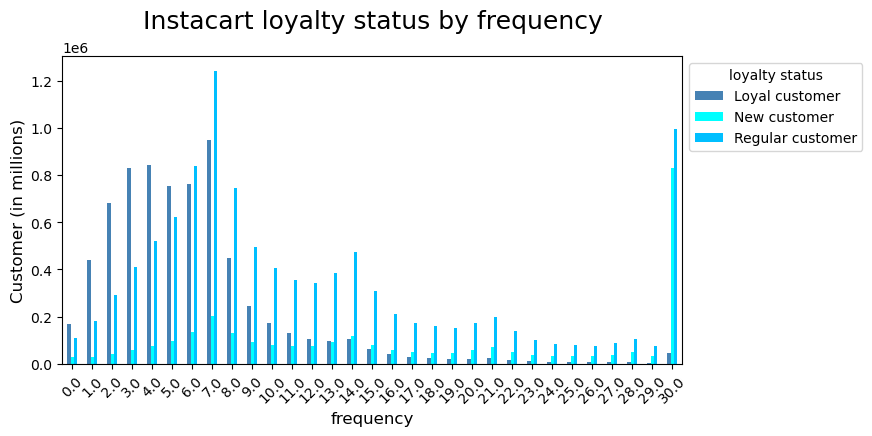

In [31]:
# Create a bar chart

bar_order_loyal = crosstab_order_loyal.plot.bar(rot = 45, color = ['steelblue', 'cyan', 'deepskyblue'], figsize = (8, 4))

bar_order_loyal.legend(title = 'loyalty status', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Loyal customer', 'New customer', 'Regular customer'])

plt.title('Instacart loyalty status by frequency', fontsize = 18, pad = 20)
plt.ylabel('Customer (in millions)', fontsize = 12)
plt.xlabel('frequency', fontsize = 12)

In [32]:
# Export

bar_order_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_loyal.png'), bbox_inches = 'tight')

### Create a crosstab with 'loyalty_flag' and 'department' 

In [33]:
crosstab_dep_loyal = pd.crosstab(df['department'], df['loyalty_flag'], dropna = False)

In [34]:
crosstab_dep_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,27034,20049,54083
babies,116775,32728,137516
bakery,266072,120629,398088
beverages,598630,277405,924055
breakfast,155110,74221,240277
bulk,9696,2904,10803
canned goods,206239,126266,376262
dairy eggs,1281801,525054,1819042
deli,226485,110657,365217


Text(0.5, 0, 'department')

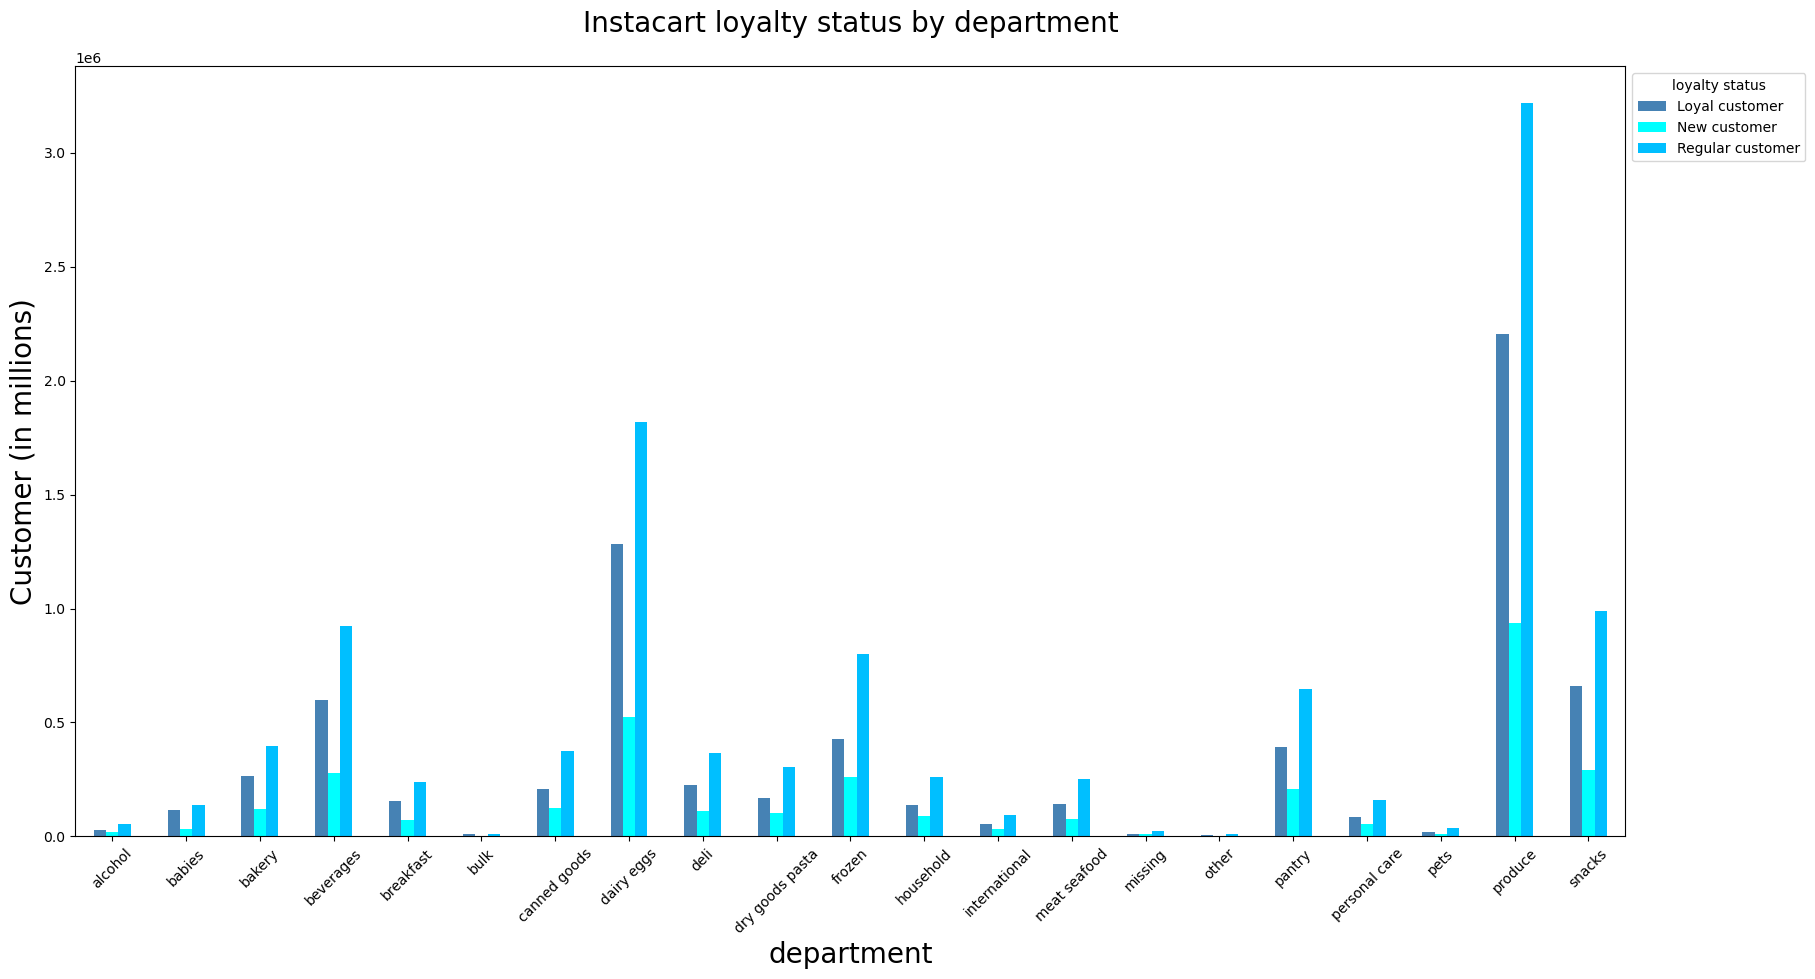

In [35]:
# Create a bar chart

bar_dep_loyal = crosstab_dep_loyal.plot.bar(rot = 45, color = ['steelblue', 'cyan', 'deepskyblue'], figsize = (20, 10))

bar_dep_loyal.legend(title = 'loyalty status', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Loyal customer', 'New customer', 'Regular customer'])

plt.title('Instacart loyalty status by department', fontsize = 20, pad = 25)
plt.ylabel('Customer (in millions)', fontsize = 20)
plt.xlabel('department', fontsize = 20)

In [36]:
# Export

bar_dep_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyal.png'), bbox_inches = 'tight')

### Create a crosstab with 'department' and 'order_time_period' columns

In [37]:
crosstab_dep_time_period = pd.crosstab(df['department'], df['order_time_period'], dropna = False)

In [38]:
crosstab_dep_time_period

order_time_period,Early bird,Night owl,Regular
department,,,
alcohol,5578,3728,91860
babies,35113,24423,227483
bakery,75509,52811,656469
beverages,161628,115259,1523203
breakfast,48014,33073,388521
bulk,2142,1833,19428
canned goods,61868,52214,594685
dairy eggs,361165,258740,3005992
deli,62054,49001,591304


(-1.0, 22.0)

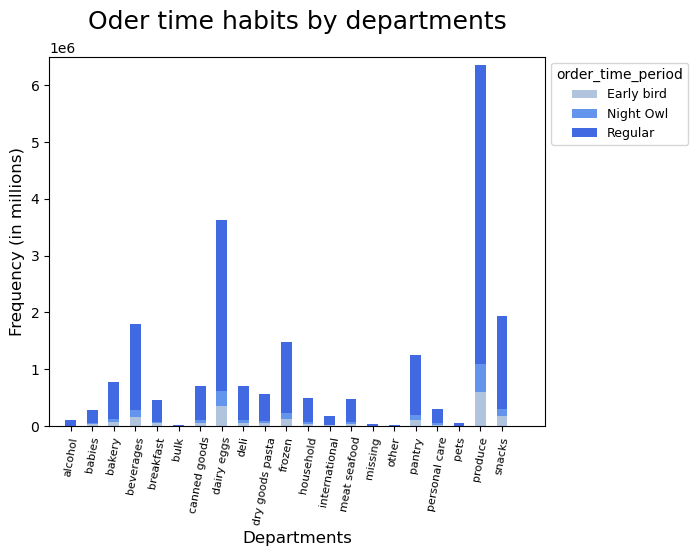

In [39]:
# Create statcked bar char

bar_dep_time_period = crosstab_dep_time_period.plot(kind = 'bar', stacked = True, color =['lightsteelblue', 'cornflowerblue', 'royalblue'])

bar_dep_time_period.legend(title='order_time_period', bbox_to_anchor=(1.0,1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)

plt.title('Oder time habits by departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

plt.ylim(-2, 6500000)
plt.xlim(-1, 22)

In [40]:
# Export

bar_dep_time_period.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_time_period.png'), bbox_inches = 'tight')